# Autoencoders Step-by-Step Example

This notebook provides a detailed, step-by-step guide to building and training an autoencoder using a neural network. We'll cover each step with explanations, code, and visualizations.

## Step 1: What is an Autoencoder?

An autoencoder is a type of neural network used for unsupervised learning that aims to learn a compressed representation (encoding) of the input data. The network is trained to minimize the difference between the input and the output (reconstruction), thereby learning efficient data representations.

An autoencoder consists of two parts:
- **Encoder**: Compresses the input into a lower-dimensional representation.
- **Decoder**: Reconstructs the original input from the compressed representation.

Autoencoders are widely used for tasks such as dimensionality reduction, image denoising, and anomaly detection.

## Step 2: Importing Required Libraries

We'll start by importing the necessary libraries for this analysis, including TensorFlow/Keras for building the neural network, and Matplotlib for visualizations.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


## Step 3: Loading and Preprocessing the Dataset

For this demonstration, we'll use the MNIST dataset, which contains 28x28 pixel grayscale images of handwritten digits. We'll normalize the pixel values to be between 0 and 1 for better performance during training.


In [2]:
# Load the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()

# Normalize the data to [0, 1]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

X_train.shape, X_test.shape


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 784), (10000, 784))

## Step 4: Building the Autoencoder Model

We'll define a simple autoencoder model with a single hidden layer (bottleneck) to compress the 784-dimensional input into a lower-dimensional representation.


In [3]:
# Dimension of the encoding (bottleneck)
encoding_dim = 32

# Input placeholder
input_img = Input(shape=(784,))

# Encoder: Compress the input to the encoding dimension
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder: Reconstruct the input from the encoding
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model with a mean squared error loss function and Adam optimizer
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Training the Autoencoder

We'll train the autoencoder using the training data. The model will learn to reconstruct the input images by minimizing the reconstruction loss.


In [4]:
# Train the autoencoder
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.1089 - val_loss: 0.0409
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0379 - val_loss: 0.0297
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0280 - val_loss: 0.0228
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0219 - val_loss: 0.0187
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0183 - val_loss: 0.0160
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0158 - val_loss: 0.0142
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0141 - val_loss: 0.0129
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0130 - val_loss: 0.0119
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/

## Step 6: Visualizing the Reconstruction Results

Let's visualize some of the original and reconstructed images to see how well the autoencoder has learned to compress and decompress the data.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


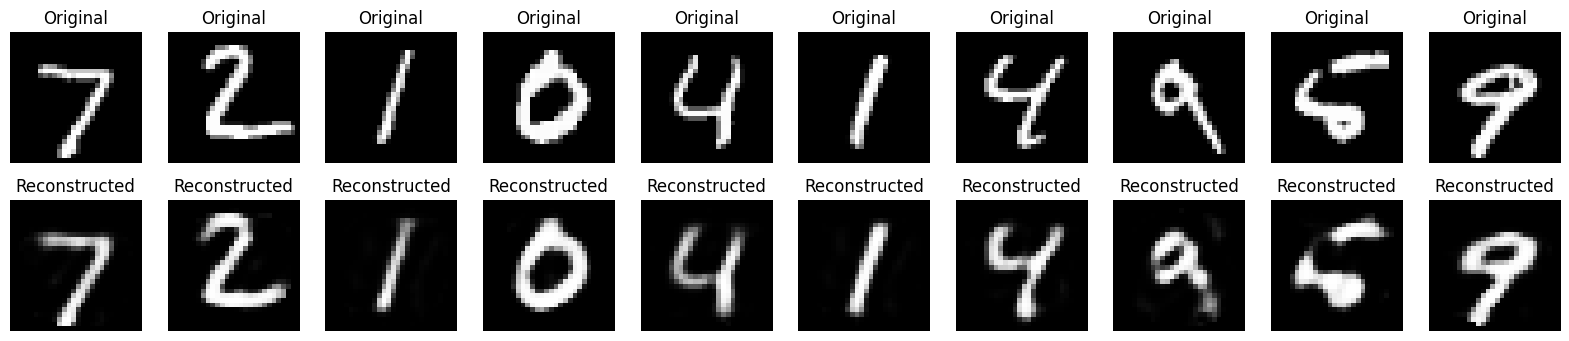

In [5]:
# Encode and decode some images from the test set
decoded_imgs = autoencoder.predict(X_test)

# Number of images to display
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
